In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import sys, warnings, os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import precision_score, recall_score
#import tensorflow as tf
%matplotlib inline
# from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
ufc_data = pd.read_csv(r"C:\Users\User\Downloads\ufc-master2.csv") 

## Анализ выборки

In [4]:
ufc_data.shape

(4473, 137)

In [5]:
ufc_data['Winner'].value_counts()


Red     2619
Blue    1854
Name: Winner, dtype: int64

In [6]:
label = ufc_data.Winner

ufc_data['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_data.Winner]

In [7]:
label = [1 if win == 'Red' else 0 for win in label]

In [84]:
num_corr = [col for col in X_train.columns if X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64']
corr_ = {}
for col in num_corr:
    corr_[col] = abs(X_train[col].corr(ufc_data['Winner']))

In [237]:
array = np.zeros(20, dtype=float)
i = 0
for w in sorted(corr_, key=corr_.get, reverse = True):
    print(w, corr_[w])
    if(i>20):
        break
    array[i] = corr_[w]
    i=i+1

tot_str_landed_bout_diff 0.41139642359748796
tot_str_attempted_bout_diff 0.3655682355769518
ev_diff 0.3458902982677351
odds_diff 0.3411954015383941
kd_bout_diff 0.3382247519888043
pass_bout_diff 0.31751888262614625
td_landed_bout_diff 0.2534008230745995
td_pct_bout_diff 0.24594054915504027
sub_attempts_bout_diff 0.1859939169451318
age_dif 0.14577520837342836
win_streak_dif 0.11867952979001507
td_attempted_bout_diff 0.10150617744878389
win_by_Decision_Split_diff 0.08536654644400982
avg_td_dif 0.08484894522333603
loss_dif 0.08359992696064682
longest_win_streak_dif 0.048792551533458975
rev_bout_diff 0.04278595821040637
win_by_TKO_Doctor_Stoppage_diff 0.02312410585558842
draw_diff 0.022500591041220153
win_by_Decision_Unanimous_diff 0.01789343663621344


In [238]:
indices = np.argsort(array)[::-1]

In [258]:
df_in = pd.DataFrame.from_dict(corr_, orient='index', columns=['A'])

In [268]:
df_in = df_in.T

In [261]:
df_in = df_in.sort_values(by='A', ascending=False)

In [270]:
feat_labels = df_in.columns

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x21f0df56860>,
 [Text(0, 0, 'tot_str_landed_bout_diff'),
  Text(1, 0, 'tot_str_attempted_bout_diff'),
  Text(2, 0, 'ev_diff'),
  Text(3, 0, 'odds_diff'),
  Text(4, 0, 'kd_bout_diff'),
  Text(5, 0, 'pass_bout_diff'),
  Text(6, 0, 'td_landed_bout_diff'),
  Text(7, 0, 'td_pct_bout_diff'),
  Text(8, 0, 'sub_attempts_bout_diff'),
  Text(9, 0, 'age_dif'),
  Text(10, 0, 'win_streak_dif'),
  Text(11, 0, 'td_attempted_bout_diff'),
  Text(12, 0, 'win_by_Decision_Split_diff'),
  Text(13, 0, 'avg_td_dif'),
  Text(14, 0, 'loss_dif'),
  Text(15, 0, 'longest_win_streak_dif'),
  Text(16, 0, 'rev_bout_diff'),
  Text(17, 0, 'win_by_TKO_Doctor_Stoppage_diff'),
  Text(18, 0, 'draw_diff'),
  Text(19, 0, 'win_by_Decision_Unanimous_diff')])

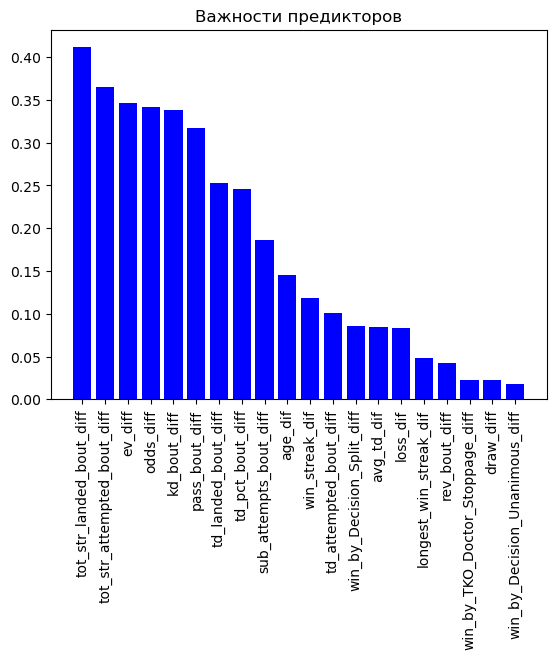

In [273]:
plt.title('Важности предикторов')
plt.bar(range(X_train.shape[1]), array[indices], color='blue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)

In [160]:
ufc_data['Winner'] = ['Red' if win == 1 else 'Blue' for win in ufc_data.Winner]

In [47]:
X_train['Winner'] = ['Red' if win == 1 else 'Blue' for win in X_train.Winner]

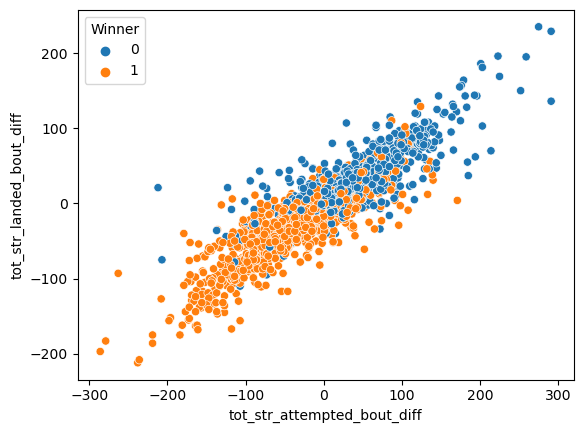

In [19]:
sns.scatterplot(x="tot_str_attempted_bout_diff", y="tot_str_landed_bout_diff", hue="Winner", data = ufc_data); 

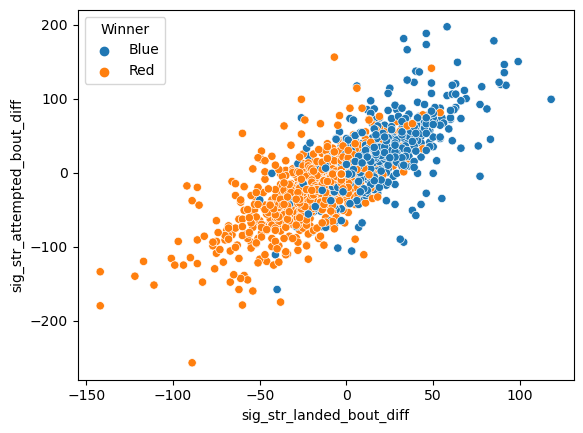

In [50]:
sns.scatterplot(x="sig_str_landed_bout_diff", y="sig_str_attempted_bout_diff", hue="Winner", data = X_train); 

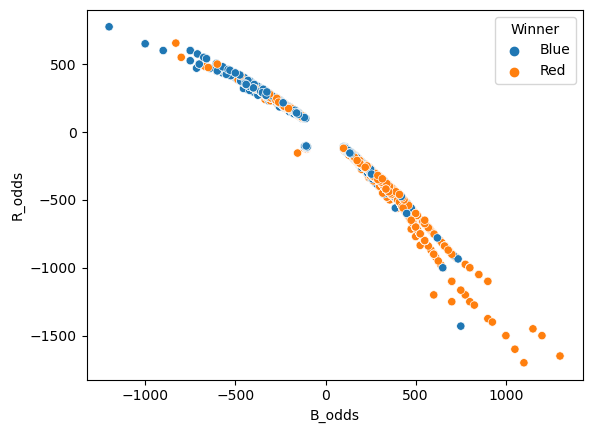

In [12]:
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = ufc_data);

In [ ]:
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = ufc_data);

In [13]:
ufc_data["Winner"].loc[ufc_data["B_odds"]>1].value_counts()

Red     1906
Blue     846
Name: Winner, dtype: int64

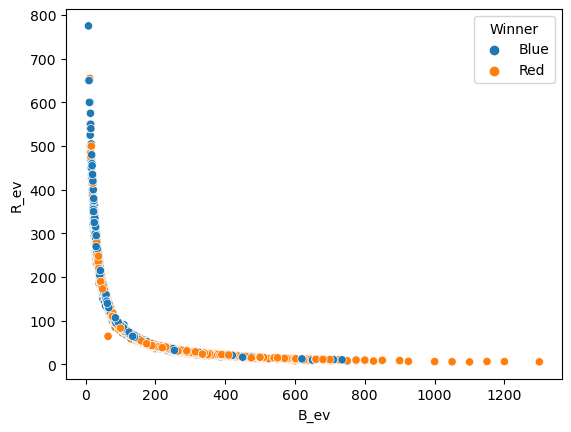

In [14]:
sns.scatterplot(x='B_ev', y='R_ev',hue = 'Winner', data=ufc_data);

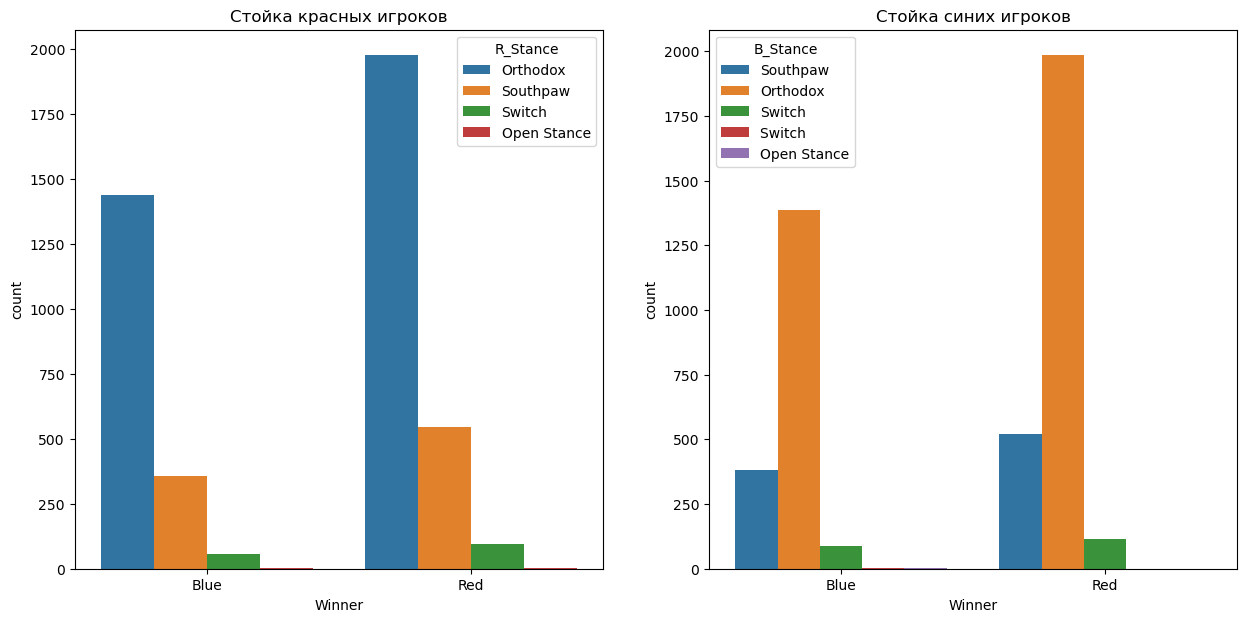

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(ufc_data['Winner'], hue = ufc_data['R_Stance'], ax=ax[0])
sns.countplot(ufc_data['Winner'], hue = ufc_data['B_Stance'], ax=ax[1])
ax[0].title.set_text('Стойка красных игроков')
ax[1].title.set_text('Стойка синих игроков')
fig.show()

## Подготовка датсета к машинному обучению

In [8]:
ufc_data['draw_diff'] = ( ufc_data['B_draw'] - ufc_data['R_draw'])
ufc_data['avg_sig_str_pct_diff'] = ( ufc_data['B_avg_SIG_STR_pct']- ufc_data['R_avg_SIG_STR_pct'])
ufc_data['avg_TD_pct_diff'] = ( ufc_data['B_avg_TD_pct']- ufc_data['B_avg_TD_pct'])
ufc_data['win_by_Decision_Majority_diff'] = (ufc_data['B_win_by_Decision_Majority']- ufc_data['R_win_by_Decision_Majority'])
ufc_data['win_by_Decision_Split_diff'] = (ufc_data['B_win_by_Decision_Split']- ufc_data['R_win_by_Decision_Split'])
ufc_data['win_by_Decision_Unanimous_diff'] = (ufc_data['B_win_by_Decision_Unanimous']- ufc_data['R_win_by_Decision_Unanimous'])
ufc_data['win_by_TKO_Doctor_Stoppage_diff'] =  (ufc_data['B_win_by_TKO_Doctor_Stoppage']- ufc_data['R_win_by_TKO_Doctor_Stoppage'])

In [9]:
ufc_data['odds_diff'] = (ufc_data['B_odds'] - ufc_data['R_odds'])
ufc_data['ev_diff'] = (ufc_data['B_ev']-ufc_data['R_ev'])


ufc_data['kd_bout_diff']=(ufc_data['B_kd_bout']-ufc_data['R_kd_bout'])
ufc_data['sig_str_landed_bout_diff']=(ufc_data['B_sig_str_landed_bout']-ufc_data['R_sig_str_landed_bout'])
ufc_data['sig_str_attempted_bout_diff']=(ufc_data['B_sig_str_attempted_bout']-ufc_data['R_sig_str_attempted_bout'])
ufc_data['sig_str_attempted_bout_diff']=(ufc_data['B_sig_str_attempted_bout']-ufc_data['R_sig_str_attempted_bout'])
ufc_data['sig_str_pct_bout_diff']=(ufc_data['B_sig_str_pct_bout']-ufc_data['R_sig_str_pct_bout'])
ufc_data['tot_str_landed_bout_diff']=(ufc_data['B_tot_str_landed_bout']-ufc_data['R_tot_str_landed_bout'])
ufc_data['tot_str_attempted_bout_diff']=(ufc_data['B_tot_str_attempted_bout']-ufc_data['R_tot_str_attempted_bout'])
ufc_data['td_landed_bout_diff']=(ufc_data['B_td_landed_bout']-ufc_data['R_td_landed_bout'])
ufc_data['td_attempted_bout_diff']=(ufc_data['B_td_attempted_bout']-ufc_data['R_td_attempted_bout'])
ufc_data['td_pct_bout_diff']=(ufc_data['B_td_pct_bout']-ufc_data['R_td_pct_bout'])
ufc_data['td_pct_bout_diff']=(ufc_data['B_td_pct_bout']-ufc_data['R_td_pct_bout'])
ufc_data['sub_attempts_bout_diff']=(ufc_data['B_sub_attempts_bout']-ufc_data['R_sub_attempts_bout'])
ufc_data['pass_bout_diff']=(ufc_data['B_pass_bout']-ufc_data['R_pass_bout'])
ufc_data['rev_bout_diff']=(ufc_data['B_rev_bout']-ufc_data['R_rev_bout'])

In [10]:
var_drop = [
'B_odds',
'R_odds',
'B_ev',
'R_ev',
'R_kd_bout',
'B_kd_bout',
'R_sig_str_landed_bout',
'B_sig_str_landed_bout',
'R_sig_str_attempted_bout',
'B_sig_str_attempted_bout',
'R_sig_str_pct_bout',
'B_sig_str_pct_bout',
'R_tot_str_landed_bout',
'B_tot_str_landed_bout',
'R_tot_str_attempted_bout',
'B_tot_str_attempted_bout',
'R_td_landed_bout',
'B_td_landed_bout',
'R_td_attempted_bout',
'B_td_attempted_bout',
'R_td_pct_bout',
'B_td_pct_bout',
'R_sub_attempts_bout',
'B_sub_attempts_bout',
'R_pass_bout',
'B_pass_bout',
'R_rev_bout',
'B_rev_bout',
'B_current_lose_streak', 'R_current_lose_streak',
'B_current_win_streak', 'R_current_win_streak',
'B_longest_win_streak', 'R_longest_win_streak',
'B_wins', 'R_wins',
'B_losses', 'R_losses',
'B_total_rounds_fought', 'R_total_rounds_fought',
'B_total_title_bouts', 'R_total_title_bouts',
'B_win_by_KO/TKO', 'R_win_by_KO/TKO',
'B_win_by_Submission', 'R_win_by_Submission',
'B_Height_cms', 'R_Height_cms',
'B_Reach_cms', 'R_Reach_cms',
'B_age', 'R_age',
'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
'B_avg_TD_landed', 'R_avg_TD_landed',
'B_draw','B_avg_SIG_STR_pct','B_avg_TD_pct','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_TKO_Doctor_Stoppage',
'R_draw','R_avg_SIG_STR_pct','R_avg_TD_pct','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']
ufc_data.drop(var_drop, axis=1, inplace = True)

In [11]:
comm_drop = [
'date','location','country','weight_class','gender','no_of_rounds','empty_arena','constant_1','finish','finish_details','finish_round','finish_round_time','total_fight_time_secs','B_Weight_lbs','R_Weight_lbs'
]
ufc_data.drop(comm_drop, axis=1, inplace = True)

In [12]:
ufc_data.drop(ufc_data.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank'], axis=1, inplace = True)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
stance = ['B_Stance', 'R_Stance']

In [15]:
ufc_data['B_Stance'].loc[ufc_data['B_Stance']=='Switch '] = 'Switch'

In [16]:
for x in stance:
    ufc_data[x] = [4 if st == 'Orthodox'
                           else 3 if st == 'Southpaw'
                           else 2 if st == 'Switch'
                           else 1 for st in ufc_data[x]]   
    ufc_data['better_rank'] = [-1 if rank == 'Red'
                               else 1 if rank == 'Blue'
                               else 0 for rank in ufc_data['better_rank']]

    ufc_data['title_bout'] = [1 if tb==True else 0 for tb in ufc_data['title_bout']]

In [17]:
ufc_data['Stance_diff'] = (ufc_data['B_Stance'] - ufc_data['R_Stance'])
ufc_data.drop(stance, axis = 1, inplace = True)

In [18]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['R_fighter', 'B_fighter']
enc = LabelEncoder()
for i in ufc_data[cat_col]:
    ufc_data[i] = enc.fit_transform(ufc_data[i])

In [19]:
cat_col = [col for col in ufc_data.columns if ufc_data[col].dtypes == 'object']
num_col = [col for col in ufc_data.columns if col not in cat_col]

In [20]:
ufc_data = ufc_data.drop('Winner', axis=1)

In [21]:
ufc_data.drop("sub_dif", axis=1, inplace = True)
ufc_data.drop("win_by_Decision_Majority_diff", axis=1, inplace = True)
ufc_data.drop("total_title_bout_dif", axis=1, inplace = True)
ufc_data.drop("R_fighter", axis=1, inplace = True)
ufc_data.drop("ko_dif", axis=1, inplace = True)
ufc_data.drop("win_dif", axis=1, inplace = True)
ufc_data.drop("avg_sub_att_dif", axis=1, inplace = True)
ufc_data.drop("Stance_diff", axis=1, inplace = True)
ufc_data.drop("total_round_dif", axis=1, inplace = True)
ufc_data.drop("height_dif", axis=1, inplace = True)
ufc_data.drop("B_fighter", axis=1, inplace = True)
ufc_data.drop("avg_sig_str_pct_diff", axis=1, inplace = True)
ufc_data.drop("lose_streak_dif", axis=1, inplace = True)
ufc_data.drop("title_bout", axis=1, inplace = True)
ufc_data.drop("sig_str_dif", axis=1, inplace = True)
ufc_data.drop("reach_dif", axis=1, inplace = True)
ufc_data.drop("better_rank", axis=1, inplace = True)
ufc_data.drop("avg_TD_pct_diff", axis=1, inplace = True)

ufc_data.drop("sig_str_landed_bout_diff", axis=1, inplace = True)
ufc_data.drop("sig_str_pct_bout_diff", axis=1, inplace = True)
ufc_data.drop("sig_str_attempted_bout_diff", axis=1, inplace = True)

In [22]:
cat_col = [col for col in ufc_data.columns if ufc_data[col].dtypes == 'object']
num_col = [col for col in ufc_data.columns if col not in cat_col]
imp = SimpleImputer(strategy='most_frequent')
imp.fit(ufc_data[num_col])
ufc_data[num_col] = imp.transform(ufc_data[num_col])

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(ufc_data, label, random_state = 0, test_size = 0.3)

In [ ]:
cat_col = [col for col in X_train.columns if X_train[col].dtypes == 'object']
num_col = [col for col in X_train.columns if col not in cat_col]
imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train[num_col])
X_train[num_col] = imp.transform(X_train[num_col])
X_valid[num_col] = imp.transform(X_valid[num_col])

## Прогнозирование с помощью метода k-ближайших соседей

In [34]:
from sklearn.neighbors import KNeighborsClassifier                 

In [35]:
neigh = KNeighborsClassifier(n_neighbors=64, weights='uniform', algorithm='brute', p=1)

In [36]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=64, p=1)

In [37]:
neigh.score(X_train, y_train)

0.7234110507824976

In [38]:
neigh.score(X_valid, y_valid)

0.6974664679582713

## Подбор параметров

In [39]:
n_neighbors_values = range(1,100)

In [212]:
scores_data = pd.DataFrame()

In [243]:
for n_neighbors in n_neighbors_values:
    neigh = KNeighborsClassifier(weights='uniform', algorithm='ball_tree', p=1, n_neighbors=n_neighbors)
    neigh.fit(X_train, y_train)
    train_score = neigh.score(X_train, y_train)
    test_score = neigh.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(neigh, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'n_neighbors': [n_neighbors], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [244]:
scores_data_long = pd.melt(scores_data, id_vars = ['n_neighbors'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

<Axes: xlabel='n_neighbors', ylabel='score'>

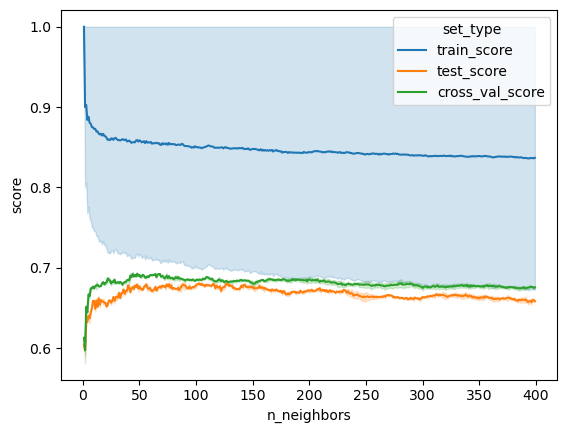

In [245]:
sns.lineplot(x='n_neighbors', y='score', hue='set_type', data=scores_data_long)

In [218]:
scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].loc[scores_data_long['score'] == scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].score.max()]

,n_neighbors,set_type,score
861,64,cross_val_score,0.694023


In [42]:
y_pred = neigh.predict(X_valid)

In [43]:
precision_score(y_valid, y_pred)

0.6994285714285714

In [44]:
recall_score(y_valid, y_pred)

0.8105960264900662

In [45]:
f1_score(y_valid, y_pred)

0.7509202453987729

In [46]:
y_predicted_prob = neigh.predict_proba(X_valid)

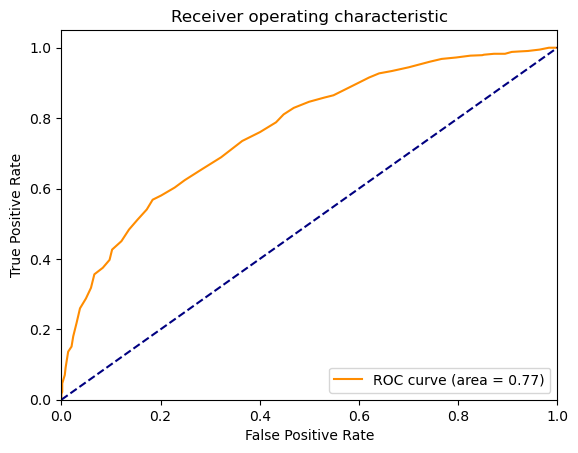

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
parametrs={'n_neighbors':  range(1, 150), 'weights': ['uniform','distance'], 'algorithm': ['ball_tree','kd_tree', 'brute']}

In [49]:
grid_search_cv_clf = GridSearchCV(neigh, parametrs, cv=5) 

In [50]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(algorithm='brute', n_neighbors=64,
                                            p=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 150),
                         'weights': ['uniform', 'distance']})

In [235]:
grid_search_cv_clf.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 44, 'weights': 'uniform'}

In [236]:
best_clf = grid_search_cv_clf.best_estimator_

In [237]:
best_clf.score(X_train, y_train)

0.7125519003513254

In [239]:
best_clf.score(X_valid, y_valid)

0.672876304023845

## Прогнозирование с помощью деревьев решений

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy',  max_depth = 8, min_samples_split = 2)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [25]:
clf.score(X_train, y_train)

0.8332801022037688

In [26]:
clf.score(X_valid, y_valid)

0.7354694485842027

[Text(0.4557291666666667, 0.9444444444444444, 'tot_str_landed_bout_diff <= 1.5\nentropy = 0.974\nsamples = 3131\nvalue = [1267, 1864]\nclass = Blue'),
 Text(0.2339891975308642, 0.8333333333333334, 'tot_str_landed_bout_diff <= -16.5\nentropy = 0.865\nsamples = 2301\nvalue = [661, 1640]\nclass = Blue'),
 Text(0.12191358024691358, 0.7222222222222222, 'ev_diff <= 122.375\nentropy = 0.433\nsamples = 652\nvalue = [58, 594]\nclass = Blue'),
 Text(0.07407407407407407, 0.6111111111111112, 'pass_bout_diff <= -0.5\nentropy = 0.619\nsamples = 319\nvalue = [49, 270]\nclass = Blue'),
 Text(0.040123456790123455, 0.5, 'win_by_Decision_Split_diff <= 1.5\nentropy = 0.333\nsamples = 163\nvalue = [10, 153]\nclass = Blue'),
 Text(0.024691358024691357, 0.3888888888888889, 'win_by_Decision_Split_diff <= -0.5\nentropy = 0.264\nsamples = 156\nvalue = [7, 149]\nclass = Blue'),
 Text(0.012345679012345678, 0.2777777777777778, 'tot_str_landed_bout_diff <= -47.5\nentropy = 0.629\nsamples = 38\nvalue = [6, 32]\nclas

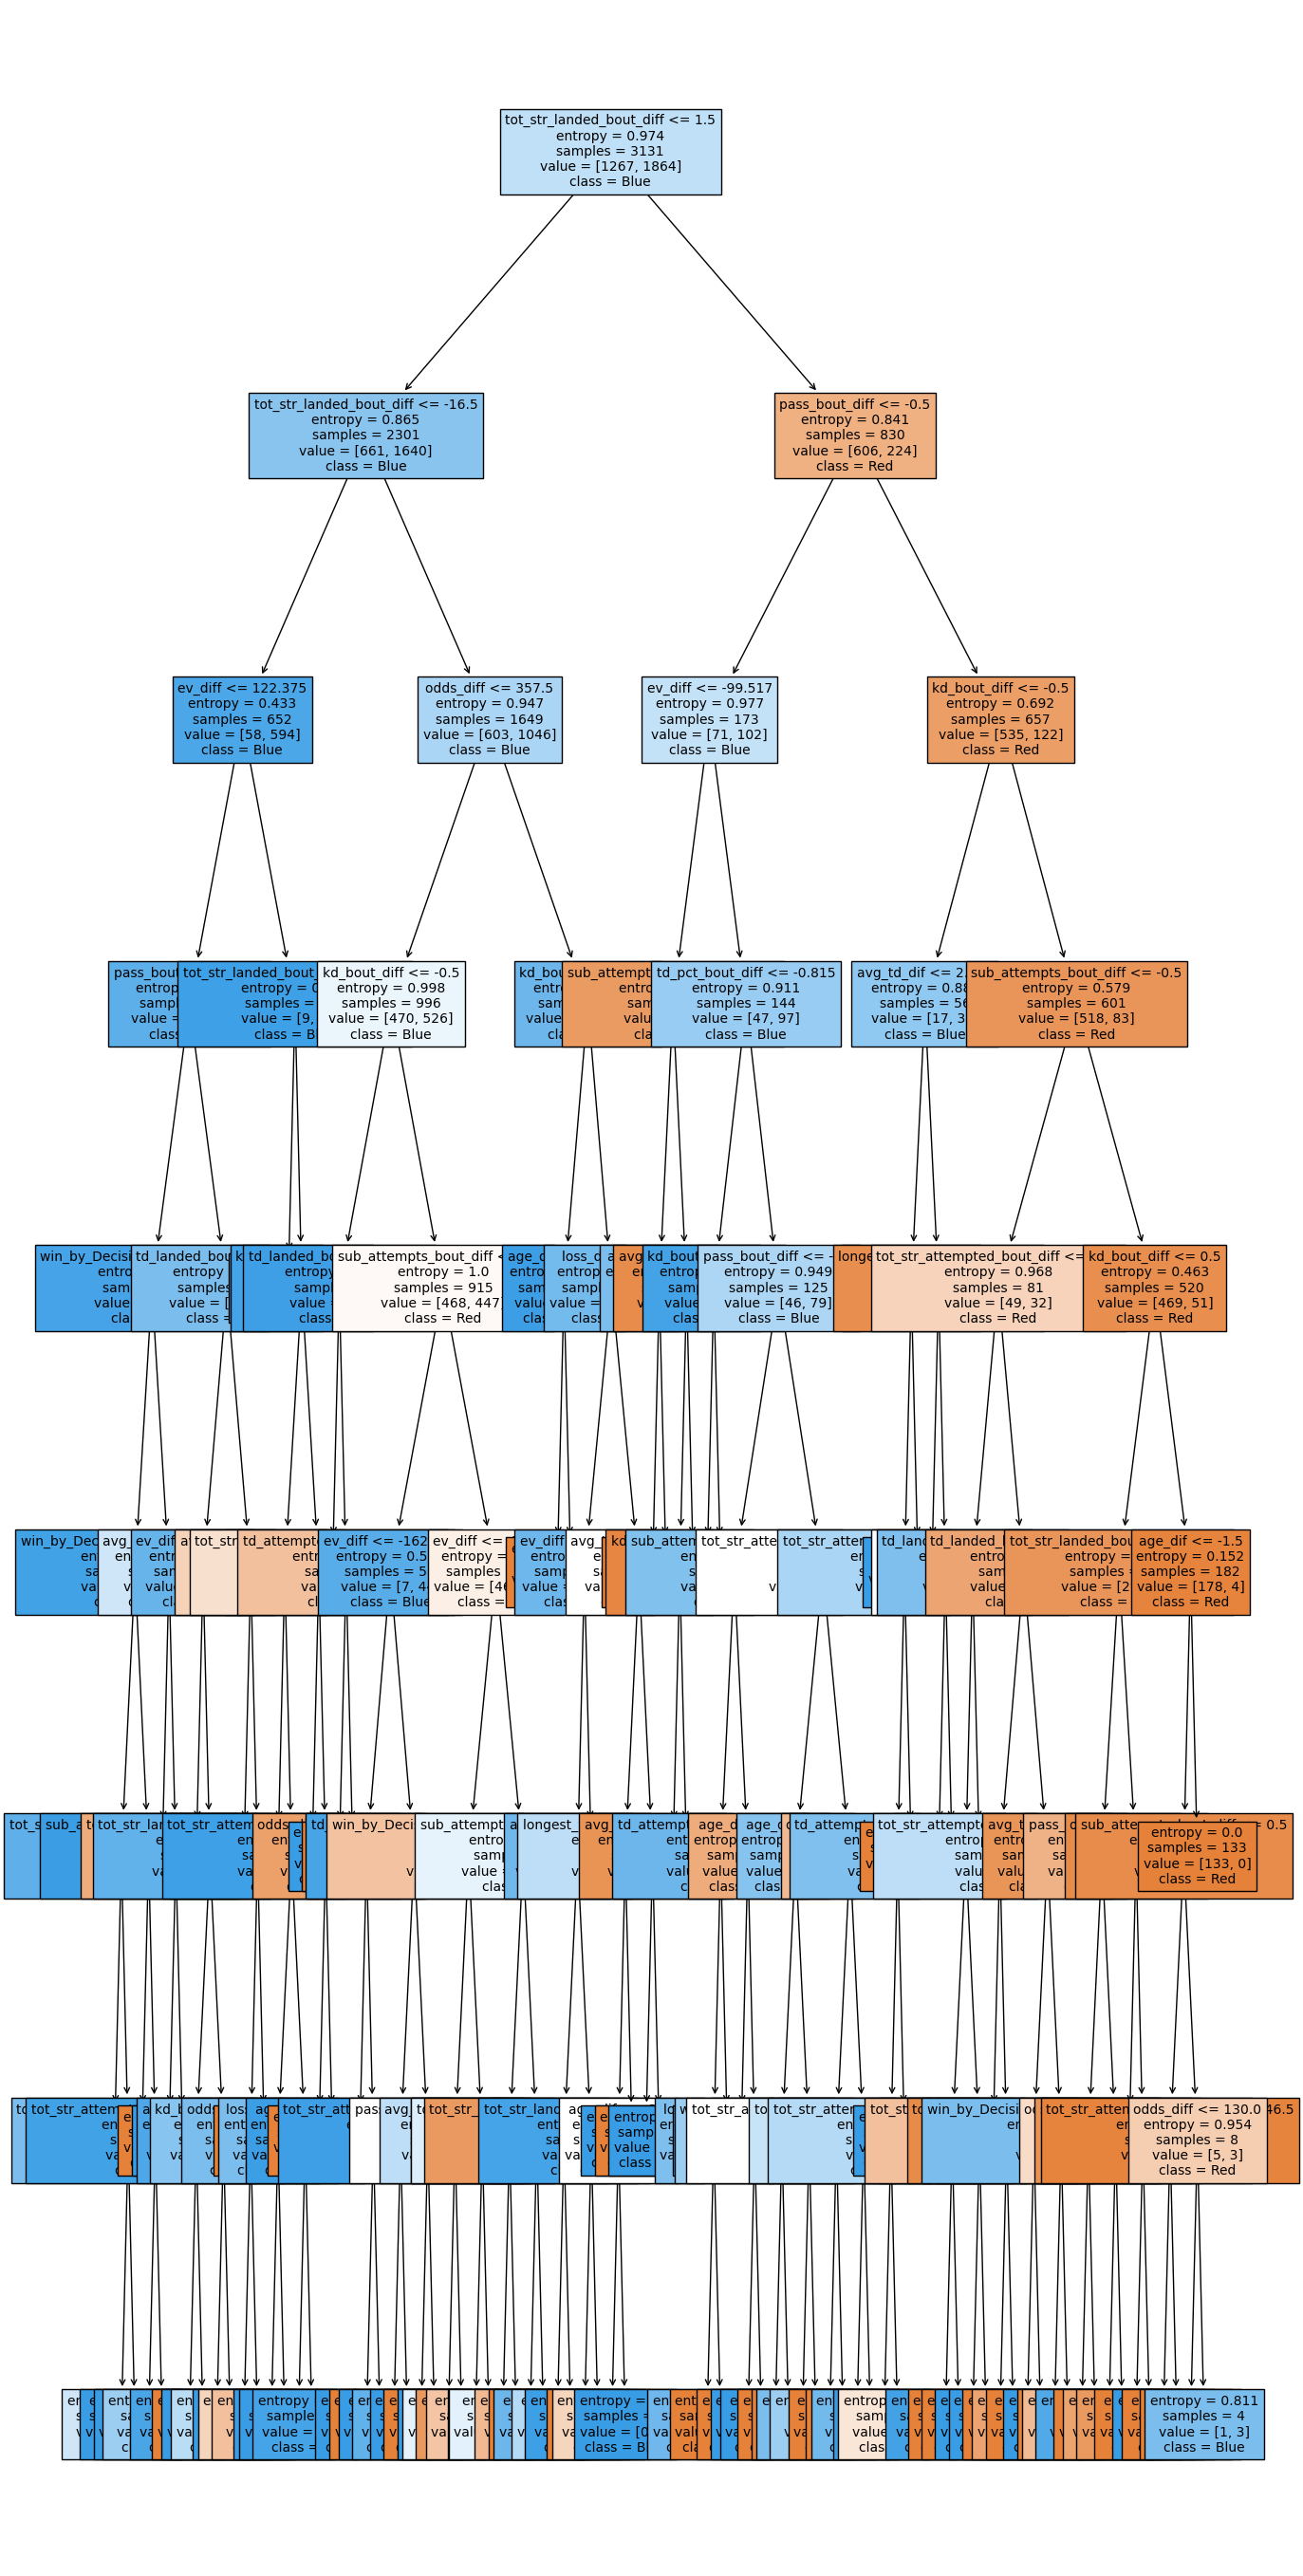

In [14]:
plt.figure(figsize=(15, 35))
tree.plot_tree(clf, fontsize=10, feature_names=list(ufc_data), filled=True, class_names = ['Red','Blue'])

In [205]:
y_pred = clf.predict(X_valid)

In [30]:
from sklearn.metrics import precision_score, recall_score

In [207]:
precision_score(y_valid, y_pred)

0.8155802861685215

In [208]:
recall_score(y_valid, y_pred)

0.6794701986754967

In [155]:
f1_score(y_valid, y_pred)

0.7407942238267148

## Подбор параметров

In [112]:
max_depth_values = range(1,100)
min_samples_split_values = range(2,20)
min_samples_leaf_values  = range(1,20)

In [109]:
scores_data = pd.DataFrame()

In [110]:
for min_samples in min_samples_leaf_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'min_samples': [min_samples], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [263]:
scores_data_long = pd.melt(scores_data, id_vars = ['min_samples'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

<AxesSubplot:xlabel='min_samples', ylabel='score'>

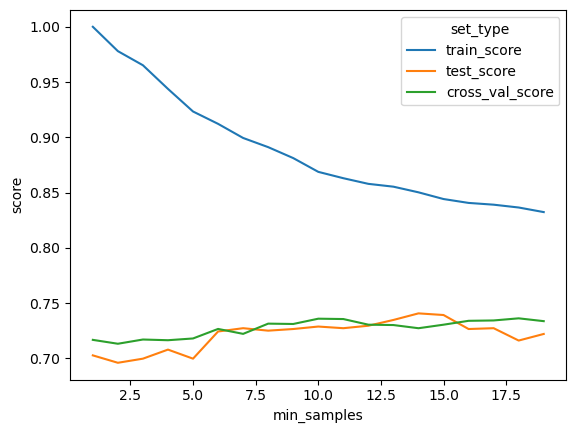

In [264]:
sns.lineplot(x='min_samples', y='score', hue='set_type', data=scores_data_long)

In [113]:
for min_samples in min_samples_split_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'min_samples': [min_samples], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [114]:
scores_data_long = pd.melt(scores_data, id_vars = ['min_samples'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

<AxesSubplot:xlabel='min_samples', ylabel='score'>

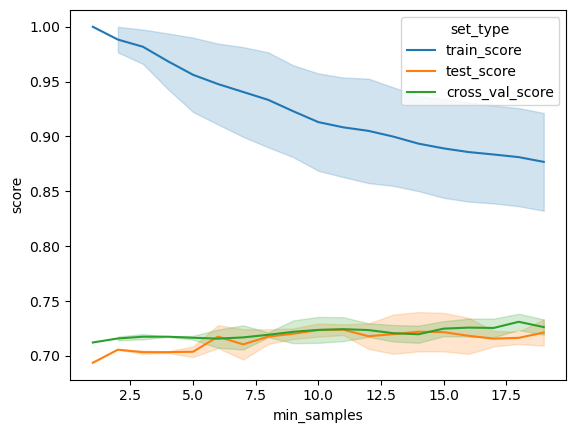

In [115]:
sns.lineplot(x='min_samples', y='score', hue='set_type', data=scores_data_long)

In [69]:
scores_data = pd.DataFrame()

In [80]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [81]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

In [83]:
train_score

1.0

<AxesSubplot:xlabel='max_depth', ylabel='score'>

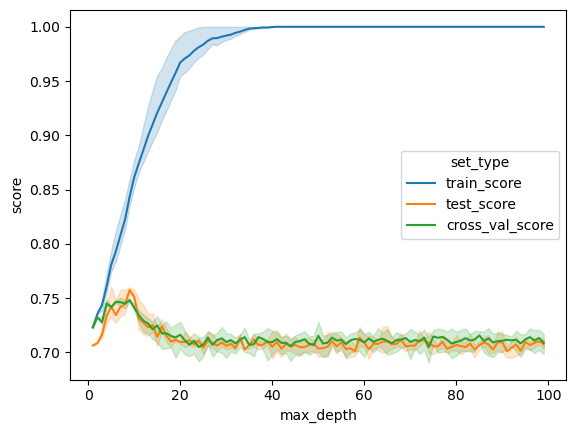

In [84]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred)

array([[378, 209],
       [ 90, 665]], dtype=int64)

In [216]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

<AxesSubplot:>

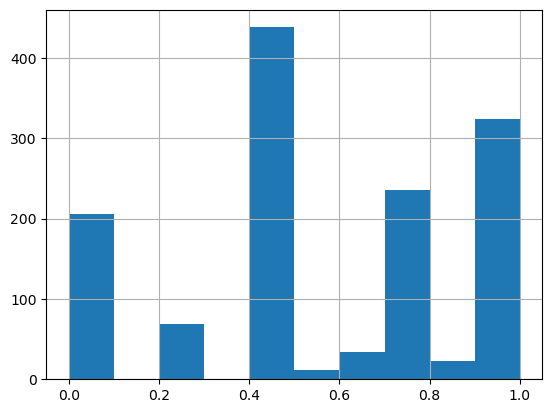

In [221]:
y_predicted_prob = clf.predict_proba(X_valid)
pd.Series(y_predicted_prob[:, 1]).hist()

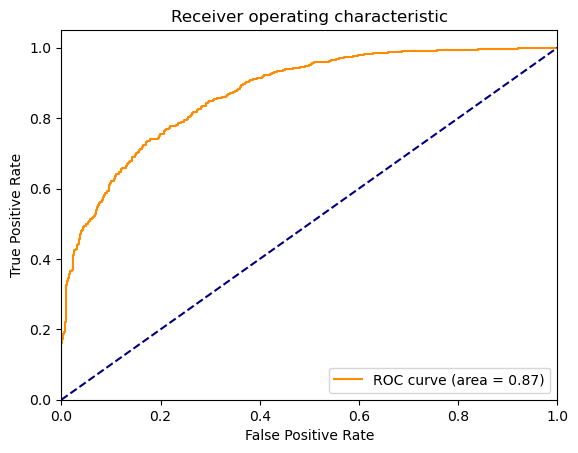

In [371]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
from sklearn import metrics

In [228]:
parametrs={'n_estimators': [10,20,30,31,40], 'max_depth': range(4, 15), 'min_samples_split': range(2, 20, 2)}

In [229]:
grid_search_cv_clf = GridSearchCV(forest, parametrs, cv=5) 

In [230]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, random_state=152),
             param_grid={'max_depth': range(4, 15),
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [10, 20, 30, 31, 40]})

In [231]:
grid_search_cv_clf.best_params_

{'max_depth': 13, 'min_samples_split': 14, 'n_estimators': 20}

In [282]:
best_clf = grid_search_cv_clf.best_estimator_

In [284]:
best_clf.score(X_train, y_train)

0.8901309485787289

In [285]:
best_clf.score(X_valid, y_valid)

0.7697466467958272

## Прогнозироваие с помощью леса случайных решенией

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
forest = RandomForestClassifier(max_depth = 8,random_state=152, min_samples_split = 8, n_estimators=300)

In [184]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=300,
                       random_state=152)

In [185]:
forest.score(X_train, y_train)

0.8339188757585436

In [186]:
print("Правильность на обучающей выборке: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовой выборке: {:.3f}".format(forest.score(X_valid, y_valid)))


Правильность на обучающей выборке: 0.834
Правильность на тестовой выборке: 0.771


In [231]:
y_pred = forest.predict(X_valid)

In [232]:
precision_score(y_valid, y_pred)

0.7705882352941177

In [233]:
recall_score(y_valid, y_pred)

0.8675496688741722

In [234]:
f1_score(y_valid, y_pred)

0.8161993769470405

In [235]:
y_predicted_prob = clf.predict_proba(X_valid)

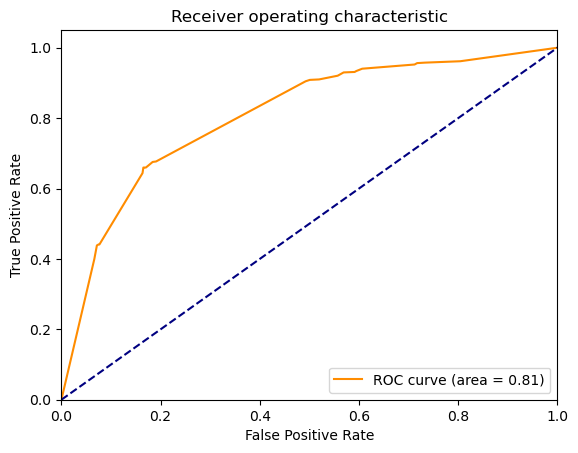

In [236]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Подбор параметров

In [181]:
scores_data = pd.DataFrame()
n_estimators_values = range(4, 300)

In [182]:
for n_estimators in n_estimators_values:
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth = 8,random_state=152, min_samples_split = 2)
    forest.fit(X_train, y_train)
    train_score = forest.score(X_train, y_train)
    test_score = forest.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(forest, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'n_estimators': [n_estimators], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [183]:
scores_data_long = pd.melt(scores_data, id_vars = ['n_estimators'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

<Axes: xlabel='n_estimators', ylabel='score'>

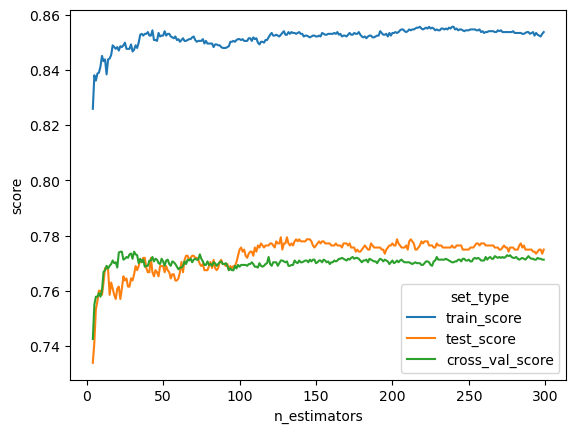

In [184]:
sns.lineplot(x='n_estimators', y='score', hue='set_type', data=scores_data_long)

In [ ]:
random_state=0, max_iter = 394, solver = 'newton-cg'

In [186]:
scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].loc[scores_data_long['score'] == scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].score.max()]

,n_estimators,set_type,score
619,31,cross_val_score,0.774197


## Прогнозирование с помощью логистической регрессии

In [241]:
from sklearn.linear_model import LogisticRegression

In [258]:
t = 'newton-cg'

In [259]:
LogR = LogisticRegression(random_state=0, max_iter = 394, solver = t, C = 60.0).fit(X_train, y_train)

In [260]:
LogR.score(X_train, y_train)

0.7876077930373683

In [261]:
LogR.score(X_valid, y_valid)

0.7704918032786885

In [206]:
y_pred = LogR.predict(X_valid)

In [207]:
recall_score(y_valid, y_pred)

0.8635761589403973

In [208]:
precision_score(y_valid, y_pred)

0.7734282325029656

In [209]:
f1_score(y_valid, y_pred)

0.8160200250312891

In [29]:
y_predicted_prob = LogR.predict_proba(X_valid)

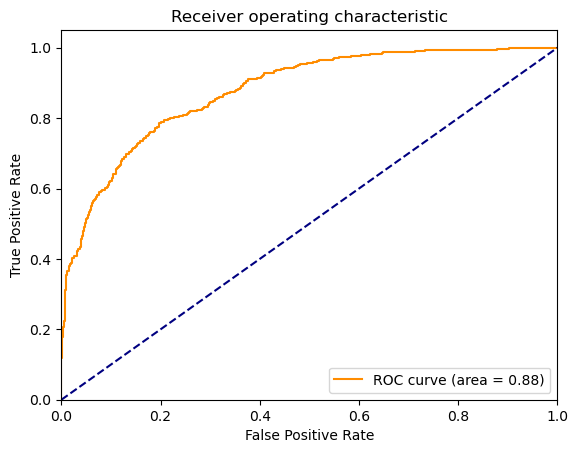

In [30]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Подбор параметрв

In [53]:
scores_data = pd.DataFrame()
max_iter_values = range(20, 400)

In [54]:
for max_iter in max_iter_values:
    LogR = LogisticRegression(max_iter=max_iter, random_state=152)
    LogR.fit(X_train, y_train)
    train_score = LogR.score(X_train, y_train)
    test_score = LogR.score(X_valid, y_valid)
    mean_cross_val_score = cross_val_score(LogR, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_iter': [max_iter], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [55]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_iter'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

In [154]:
scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].loc[scores_data_long['score'] == scores_data_long.loc[scores_data_long['set_type'] == 'cross_val_score'].score.max()]

NameError: name 'scores_data_long' is not defined

<AxesSubplot:xlabel='max_iter', ylabel='score'>

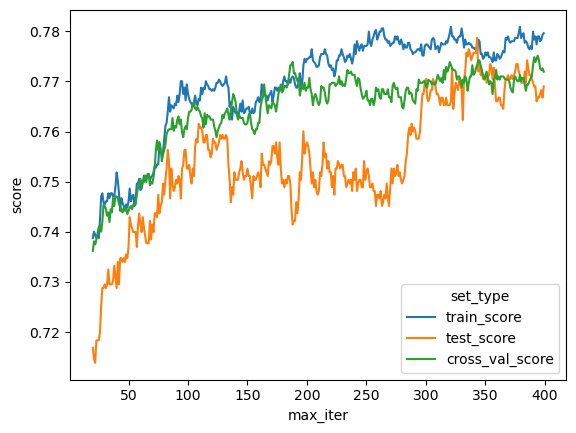

In [56]:
sns.lineplot(x='max_iter', y='score', hue='set_type', data=scores_data_long)

In [46]:
parametrs={'max_iter': range(394, 400, 2), 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [47]:
grid_search_cv_clf = GridSearchCV(LogR, parametrs, cv=5) 

In [48]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': range(394, 400, 2),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [50]:
grid_search_cv_clf.best_params_

{'max_iter': 394, 'solver': 'newton-cg'}

## Прогнозирование с помощью линейного дискриминантного анализ

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [269]:
LDA = LinearDiscriminantAnalysis(solver='eigen', store_covariance = False, shrinkage=0, tol=0.0000000000000001)

In [270]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0, solver='eigen', tol=1e-16)

In [264]:
LDA.score(X_train, y_train)

0.778984350047908

In [265]:
LDA.score(X_valid, y_valid)

0.7652757078986587

In [27]:
y_pred = LDA.predict(X_valid)

In [ ]:
parametrs={'solver': ['svd', 'lsqr', 'eigen']}

In [28]:
precision_score(y_valid, y_pred)

0.7608695652173914

In [29]:
recall_score(y_valid, y_pred)

0.8807947019867549

In [30]:
f1_score(y_valid, y_pred)

0.816451810926949

In [62]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [196]:
predictions = forest.predict(X_valid)

In [197]:
cm = confusion_matrix(y_valid, predictions, labels=forest.classes_)

In [201]:
y_predicted_prob = forest.predict_proba(X_valid)

In [199]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=forest.classes_)

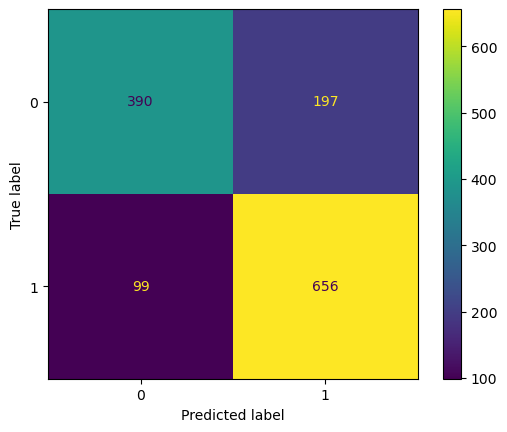

In [200]:
disp.plot()

In [44]:
plt.show()

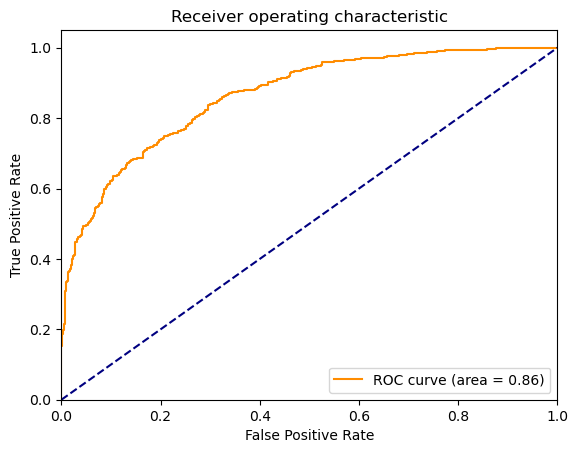

In [202]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()